# Exercise 2

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
% matplotlib inline
import os
import pandas as pd

In [2]:
# Plot output defaults
IMG_DIR = 'img'
IMG_FORMAT = 'pdf'
IMG_WIDTH = 7 # inches

In [3]:
def save_fig(fig, name, width=IMG_WIDTH, img_dir=IMG_DIR, img_format=IMG_FORMAT):
    """Save `matplotlib.figure.Figure` instance, resized to the specified width"""
    # Resize
    w, h = fig.get_size_inches()
    fig.set_size_inches(width, width/w * h)
    
    fname = '.'.join((os.path.join(img_dir, name), img_format))
    fig.savefig(fname)
    print('Saved:',fname)

## Question 1
Plot calibrated ages versus depth.

In [4]:
df = pd.read_csv('data/nps.csv', index_col=0) # all depths, nps

In [5]:
df = pd.read_csv('data/nps.csv', index_col=0) # all depths, nps
df2 = pd.read_csv('data/age_tie_points.csv', index_col=0) # only tie points

# Mark tie_points
df2['tie_point'] = True
df2 = df2[['tie_point']] # delete redundant age column
df = pd.concat((df, df2), axis=1)
df.ix[:, 'tie_point'].fillna(False, inplace=True)

Saved: img/line_age_depth.pdf


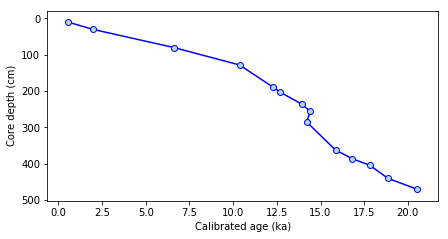

In [6]:
fig, ax = plt.subplots(figsize=(IMG_WIDTH,IMG_WIDTH/2))
age = df['age']/1000. # years to ka
ax.plot(age, df.index, c='blue')
ax.scatter(age[df.tie_point], df[df.tie_point].index,
           c='lightblue', edgecolors='blue',
           zorder=ax.lines[0].get_zorder()+1)
ax.set_xlabel('Calibrated age (ka)')
ax.set_ylabel('Core depth (cm)')
plt.gca().invert_yaxis()

save_fig(fig, 'line_age_depth')

## Question 2
Plot %Nps vs Age. How does it compare to the Greenland ice core records?

In [7]:
df3 = pd.read_csv('data/NGRIP_d18O.csv', index_col=0)

Saved: img/timeseries_nps_ngrip.pdf


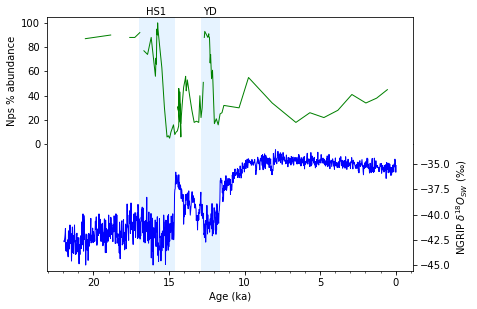

In [8]:
fig, axes = plt.subplots(2, sharex=True,)
axes[0].plot(age, df.nps,
             c='green', linewidth=1)
axes[0].set_ylabel('Nps % abundance')
axes[0].spines['bottom'].set_visible(False)
axes[0].tick_params('x', bottom=False)
#axes[0].patch.set_visible(False)

axes[1].plot(df3, c='blue', linewidth=1)
axes[1].set_ylabel('NGRIP $\delta^{18}O_{SW}$ (\u2030)')
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')
#axes[1].patch.set_visible(False)
axes[1].spines['top'].set_visible(False)

# Mark stadials
for i, (period, bounds) in enumerate([('HS1', (14.7, 17)),
                                      ('YD', (12.9, 11.7))]):
    for j, ax in enumerate(axes):
        ax.axvspan(*bounds, color='#e6f3ff', zorder=i+j)
        if not j:
            xy = ((bounds[0]+bounds[1])/2, ax.get_ylim()[1]-0.05)
            ax.annotate(period, xy, ha='center', va='bottom')

axes[1].xaxis.set_minor_locator(MultipleLocator(1))
axes[1].xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlabel('Age (ka)')
plt.gca().invert_xaxis()
fig.subplots_adjust(hspace=0)
plt.gcf().subplots_adjust(right=0.85) # make some room for ylabel
save_fig(fig, 'timeseries_nps_ngrip')

### Question 3
Calculate the offset between planktic and benthic 14C ages, plot the B-P ages.
What do these suggest about the radiocarbon age of the deep water through the deglacial? How would you interpret this in terms of circulation change?

In [9]:
df4 = pd.read_csv('data/depth_age_B-P.csv', index_col=0)

Saved: img/timeseries_B-P.pdf
Saved: img/timeseries_B-P.pdf


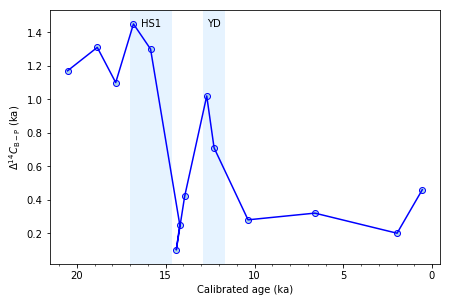

In [10]:
fig, ax = plt.subplots()
ax.scatter(df4['age']/1000., df4['B-P']/1000.,
           edgecolors='blue', facecolors='lightblue')
ax.plot(df4['age']/1000., df4['B-P']/1000., 'b-')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlabel('Calibrated age (ka)')
ax.set_ylabel('$\mathrm{\Delta}^{14}C_{\mathrm{B-P}}$ (ka)')
plt.gca().invert_xaxis()

# Mark stadials
for i, (period, bounds) in enumerate([('HS1', (14.7, 17)),
                                      ('YD', (12.9, 11.7))]):
    ax.axvspan(*bounds, color='#e6f3ff', zorder=0)
    xy = ((bounds[0]+bounds[1])/2, ax.get_ylim()[1]-0.05)
    ax.annotate(period, xy, ha='center', va='top')

    save_fig(fig, 'timeseries_B-P')

### Question 4

Interpret B-P $^{14}C$ changes with respect to $\mathrm{\epsilon}$Nd and Pa/Th.

In [11]:
df5 = pd.read_csv('data/pa_th.csv')
df6 = pd.read_csv('data/unclean_forams_eNd.csv', index_col=0)
df7 = pd.read_csv('data/fish_teeth_eNd.csv', index_col=0)

Saved: img/timeseries_B-P_PaTh_eNd.pdf


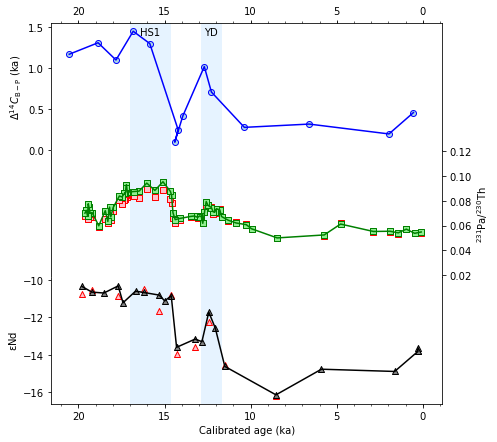

In [12]:
fig, axes = plt.subplots(3, sharex=True, figsize=(IMG_WIDTH, IMG_WIDTH))
# B-P
axes[0].scatter(df4['age']/1000., df4['B-P']/1000.,
           edgecolors='blue', facecolors='lightblue')
axes[0].plot(df4['age']/1000., df4['B-P']/1000., c='blue')

axes[0].set_ylabel('$\mathrm{\Delta}^{14}C_{\mathrm{B-P}}$ (ka)')
axes[0].spines['bottom'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].xaxis.set_minor_locator(MultipleLocator(1))
axes[0].xaxis.set_major_locator(MultipleLocator(5))

# Pa/Th
axes[1].scatter(df5['age'], df5['pa_th_232'], marker='s',
                facecolor='pink', edgecolor='red')
axes[1].scatter(df5['age'], df5['pa_th_238'], marker='s',
                facecolor='lightgreen', edgecolor='green')
axes[1].plot(df5['age'], df5['pa_th_238'], c='green')

axes[1].set_ylabel('$^{231}$Pa/$^{230}$Th')
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)

# eNd
axes[2].scatter(df7['age'], df7['eNd'], marker='^', # fish-teeth
                facecolor='pink', edgecolor='red')
axes[2].scatter(df6['age'], df6['eNd'], marker='^', # forams
               facecolor='grey', edgecolor='black')
axes[2].plot(df6['age'], df6['eNd'], c='black')

axes[2].set_ylabel('$\mathrm{\epsilon}$Nd')
axes[2].spines['top'].set_visible(False)

# Mark stadials
for i, (period, bounds) in enumerate([('HS1', (14.7, 17)),
                                      ('YD', (12.9, 11.7))]):
    for j, ax in enumerate(axes):
        ax.axvspan(*bounds, color='#e6f3ff', zorder=0)
        if not j:
            xy = ((bounds[0]+bounds[1])/2, ax.get_ylim()[1]-0.05)
            ax.annotate(period, xy, ha='center', va='top')


plt.gca().invert_xaxis()
fig.subplots_adjust(hspace=0)
axes[2].xaxis.set_minor_locator(MultipleLocator(1))
axes[2].xaxis.set_major_locator(MultipleLocator(5))
axes[2].set_xlabel('Calibrated age (ka)')

save_fig(fig, 'timeseries_B-P_PaTh_eNd')